In [16]:
import pandas as pd
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt


In [24]:
# Load the crime dataset and remove crimes that are not of immediate interest
crime_df = pd.read_csv("/Users/someshsahu/Documents/DSAI Project/crimes.csv")

crime_counts = crime_df['OFNS_DESC'].value_counts()
filtered_df = crime_df[crime_df['OFNS_DESC'].isin(crime_counts[crime_counts > 1000].index)]



removed_filtered_df = filtered_df.drop(filtered_df[filtered_df['OFNS_DESC'].isin(['VOIDED ARRESTS', 'OTHER STATE LAWS', 'FORGERY', 'FRAUDS', 'OFFENSES INVOLVING FRAUD', 'INTOXICATED & IMPAIRED DRIVING', 'OTHER TRAFFIC INFRACTION', 'INTOXICATED/IMPAIRED DRIVING', 'GAMBLING', 'THEFT-FRAUD', 'MOVING INFRACTIONS', 'ADMINISTRATIVE CODE', 'OTHER STATE LAWS (NON PENAL LA'])].index)
removed_filtered_df.columns
new_df = removed_filtered_df.iloc[0:100]


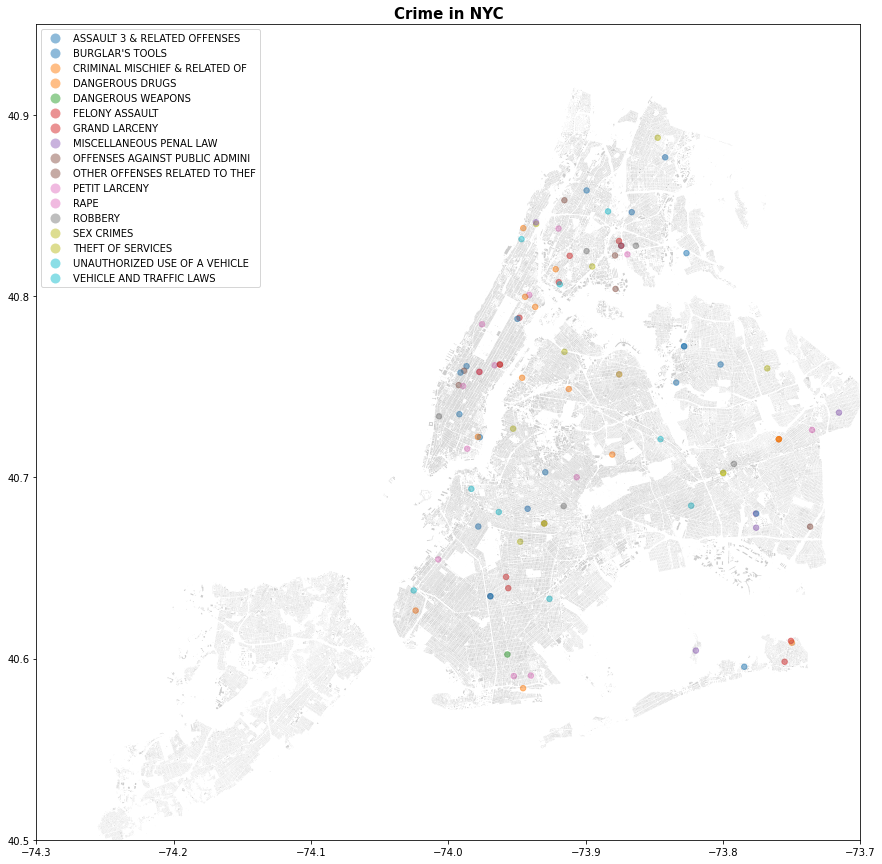

In [25]:
street_map = gpd.read_file('/Users/someshsahu/Downloads/Shapefiles and base map/geo_export_e32126a9-4611-4f2e-a62d-d39fdd22619e.shp')
street_map.to_crs(4326)


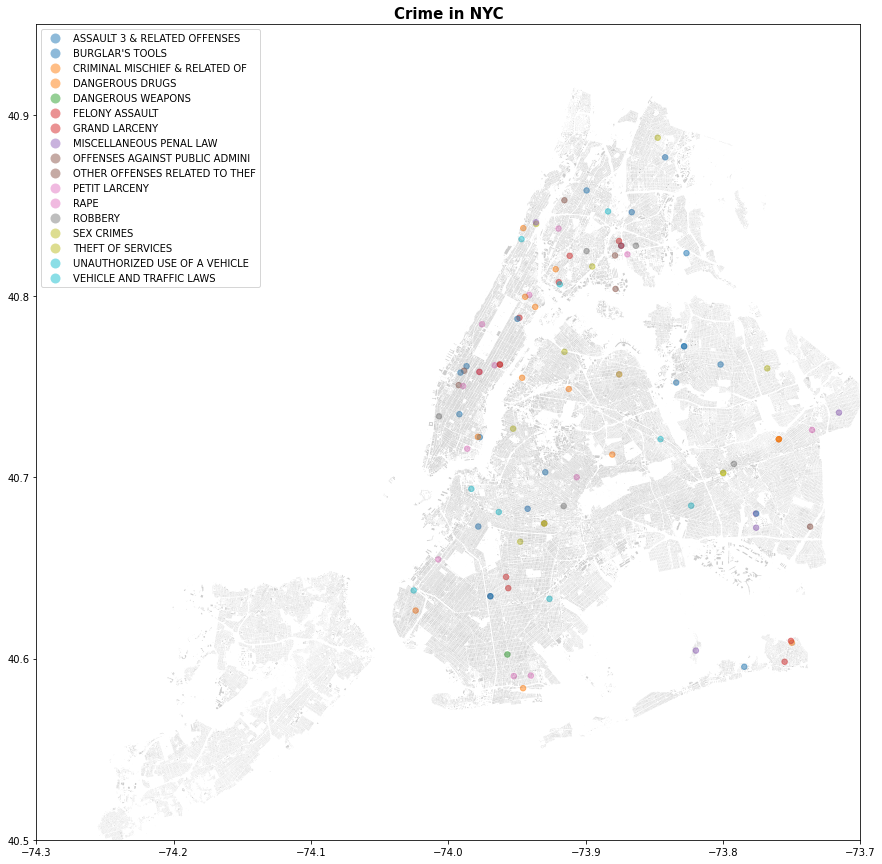

In [26]:
geometry21 = [Point(xy) for xy in zip(new_df['Longitude'], new_df['Latitude'])]
geo_df21 = gpd.GeoDataFrame(new_df, crs="EPSG:4326", geometry=geometry21)
geo_df21

#plot both streetmap and and long/lat points
fig, ax = plt.subplots(figsize=(15,15))
geo_df21.plot(column="OFNS_DESC", ax=ax,alpha=0.5, legend=True,markersize=30)
street_map.to_crs(4326).plot(ax=ax, alpha=0.4,color='grey')
# add title to graph
plt.title('Crime in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.3, -73.7)
plt.ylim(40.5, 40.95)
plt.show()